In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import problem

# Loading the data

In [2]:
X_train, y_train = problem.get_train_data()

In [3]:
print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))

X_train shape : (28756, 11)
y_train shape : (28756,)


In [83]:
print(X_train.columns)

Index(['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws',
       'Is', 'Ir'],
      dtype='object')


In [5]:
print(X_train.head())

                     year  month  day  hour  DEWP  TEMP    PRES cbwd   Iws  \
2010-01-02 00:00:00  2010      1    2     0   -16  -4.0  1020.0   SE  1.79   
2010-01-02 01:00:00  2010      1    2     1   -15  -4.0  1020.0   SE  2.68   
2010-01-02 02:00:00  2010      1    2     2   -11  -5.0  1021.0   SE  3.57   
2010-01-02 03:00:00  2010      1    2     3    -7  -5.0  1022.0   SE  5.36   
2010-01-02 04:00:00  2010      1    2     4    -7  -5.0  1022.0   SE  6.25   

                     Is  Ir  
2010-01-02 00:00:00   0   0  
2010-01-02 01:00:00   0   0  
2010-01-02 02:00:00   0   0  
2010-01-02 03:00:00   1   0  
2010-01-02 04:00:00   2   0  


Let 's look at the metadata we have :

- No: row number 
- year: year of data in this row 
- month: month of data in this row 
- day: day of data in this row 
- hour: hour of data in this row 
- pm2.5: PM2.5 concentration (ug/m^3) 
- DEWP: Dew Point (â„ƒ) 
- TEMP: Temperature (â„ƒ) 
- PRES: Pressure (hPa) 
- cbwd: Combined wind direction 
- Iws: Cumulated wind speed (m/s) 
- Is: Cumulated hours of snow 
- Ir: Cumulated hours of rain

In [114]:
print('Number of different values taken by each feature :')
for col in X_train.columns :
    print(col, X_train[col].unique().size)

Number of different values taken by each feature :
year 4
month 12
day 31
hour 24
DEWP 58
TEMP 61
PRES 59
cbwd 4
Iws 2384
Is 28
Ir 37


In [115]:
# Taking the quantitative features and categorical features for future analysis
full_train = pd.concat((X_train, y_train), axis=1)
quant_cols = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
data_quant = full_train[quant_cols]
cat_cols = [col for col in full_train.columns if col not in quant_cols]
data_cat = full_train[cat_cols]

# Analysis of the target with respect to the time

## Let's have a look at the evolution of pm2.5 during a day

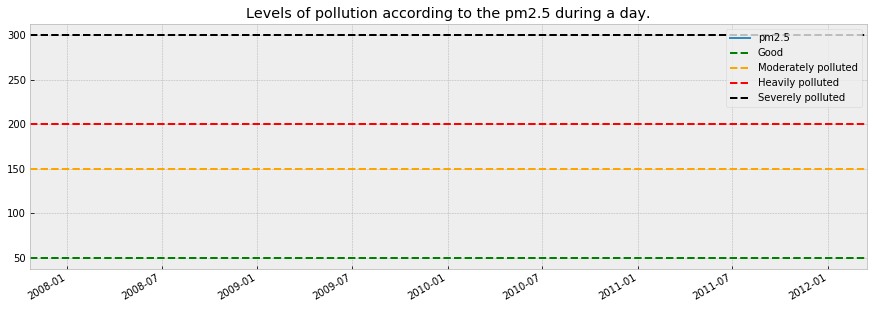

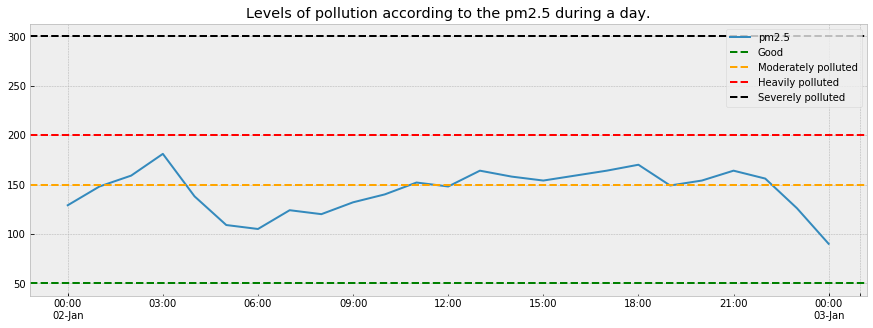

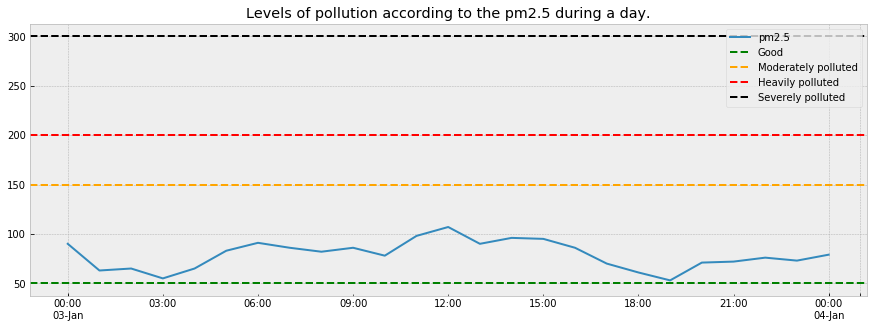

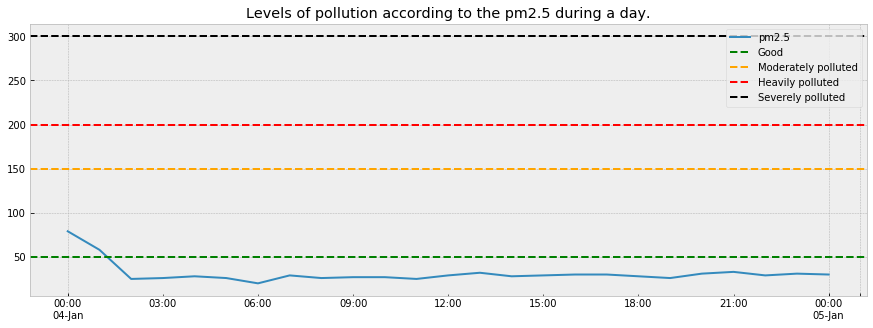

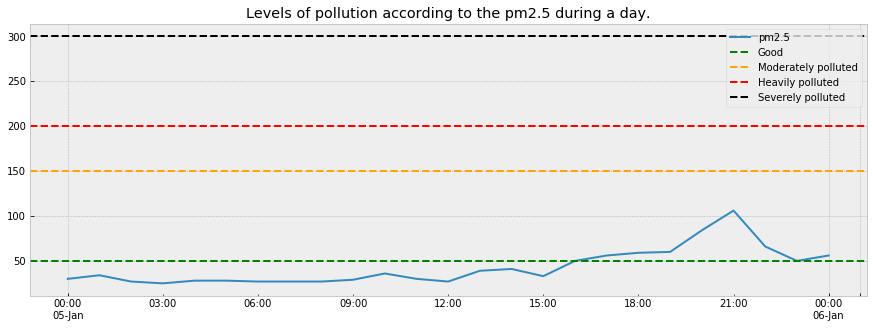

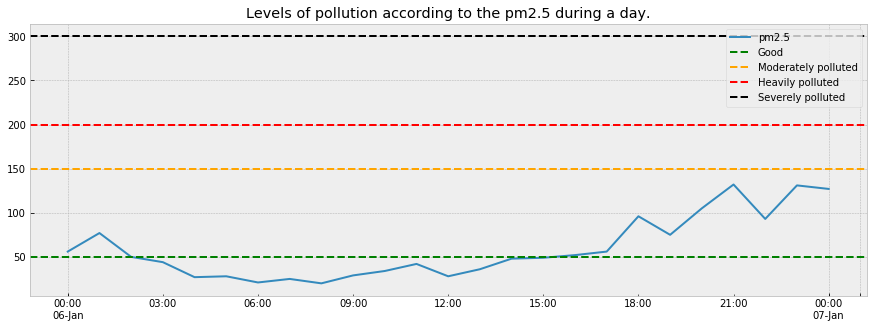

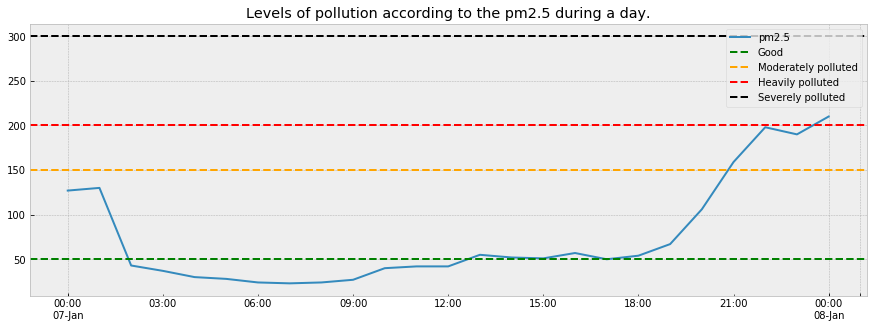

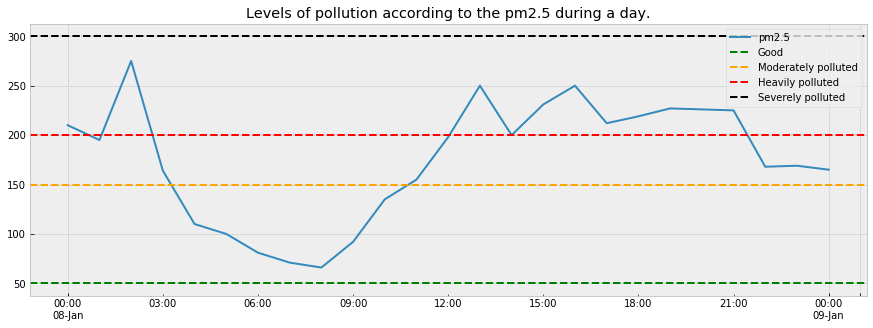

In [7]:
for i in range(1, 9) :
    plt.figure()
    start, stop = '2010-01-0{} 00:00:00'.format(i), '2010-01-0{} 00:00:00'.format(i+1)
    ax = y_train[start:stop].plot(figsize=(15, 5))
    ax.axhline(50, color='g', linestyle='--', label = 'Good')
    ax.axhline(150, color='orange', linestyle='--', label = 'Moderately polluted')
    ax.axhline(200, color='red', linestyle='--', label = 'Heavily polluted')
    ax.axhline(300, color='black', linestyle='--', label = 'Severely polluted')
    plt.title('Levels of pollution according to the pm2.5 during a day.')
    plt.legend()
    plt.show()
    plt.close()

## Let's have a look at the evolution of pm2.5 during a month

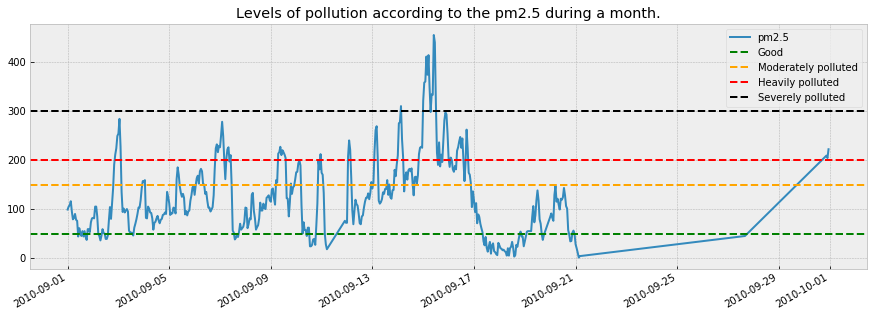

In [8]:
start, stop = '2010-09-01', '2010-09-30'
ax = y_train[start:stop].plot(figsize=(15, 5))
ax.axhline(50, color='g', linestyle='--', label = 'Good')
ax.axhline(150, color='orange', linestyle='--', label = 'Moderately polluted')
ax.axhline(200, color='red', linestyle='--', label = 'Heavily polluted')
ax.axhline(300, color='black', linestyle='--', label = 'Severely polluted')
plt.title('Levels of pollution according to the pm2.5 during a month.')
plt.legend()

## Let's have a look at the evolution of pm2.5 during a year

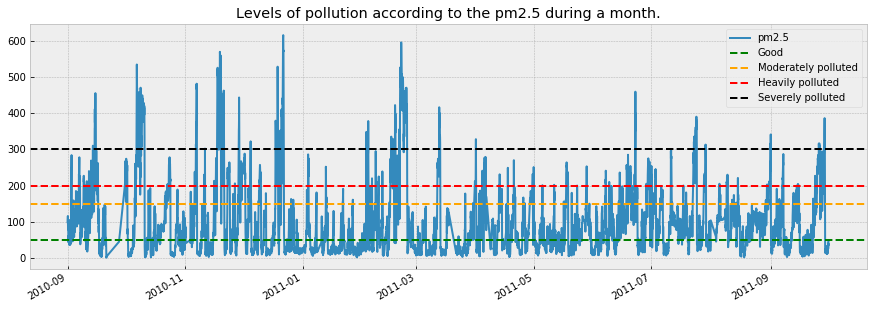

In [9]:
start, stop = '2010-09-01', '2011-09-30'
ax = y_train[start:stop].plot(figsize=(15, 5))
ax.axhline(50, color='g', linestyle='--', label = 'Good')
ax.axhline(150, color='orange', linestyle='--', label = 'Moderately polluted')
ax.axhline(200, color='red', linestyle='--', label = 'Heavily polluted')
ax.axhline(300, color='black', linestyle='--', label = 'Severely polluted')
plt.title('Levels of pollution according to the pm2.5 during a month.')
plt.legend()

Remarks :
    - at the scale of a day, we don't see most of the time big variations
    - during a month the variations are big
    - we don't see any visual trends

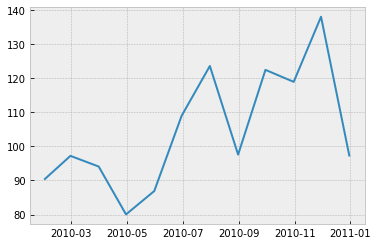

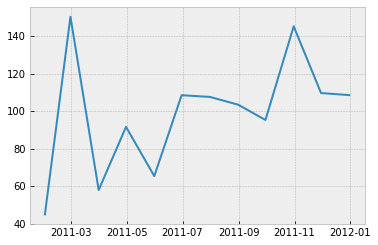

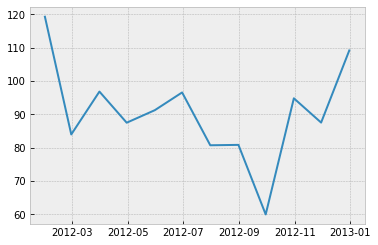

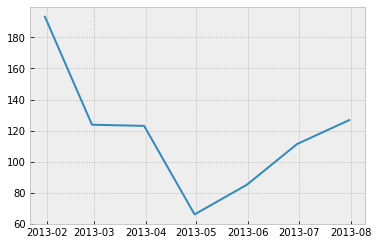

In [10]:
y_train_month = y_train.groupby(pd.Grouper(freq="M")).mean()  # DataFrameGroupBy (grouped by Month)
i = 0
while i < len(y_train_month):
    plt.figure()
    plt.plot(y_train_month[i:i+12])
    i += 12

In [67]:
# Building labels of gravity 
grav_levels = np.zeros(full_train.shape[0])
for i in range(full_train.shape[0]) :
    if full_train['pm2.5'][i] < 50 :
        grav_levels[i] = 1
    elif full_train['pm2.5'][i] >= 50 and full_train['pm2.5'][i] < 150 :
        grav_levels[i] = 2
    elif full_train['pm2.5'][i] >= 150 and full_train['pm2.5'][i] < 200 :
        grav_levels[i] = 3
    elif full_train['pm2.5'][i] >= 200 and full_train['pm2.5'][i] < 300 :
        grav_levels[i] = 4
    else :
        grav_levels[i] = 5
        
full_train['Level of pollution'] = pd.Series(grav_levels, index=full_train.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

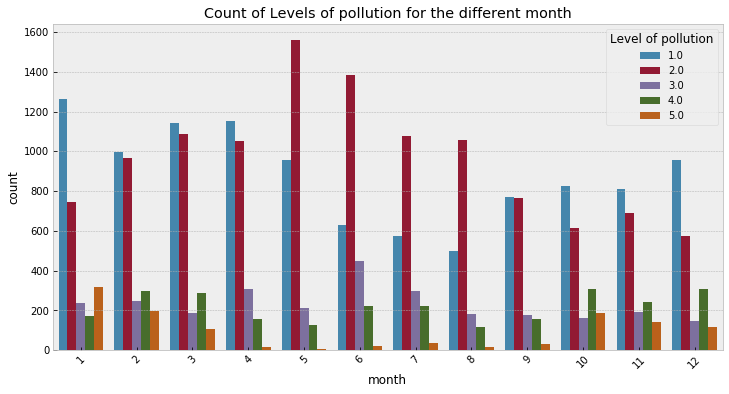

In [68]:
plt.figure(figsize = (12, 6))
plt.title('Count of Levels of pollution for the different month')
sns.countplot(x = 'month' , hue='Level of pollution', data = full_train)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

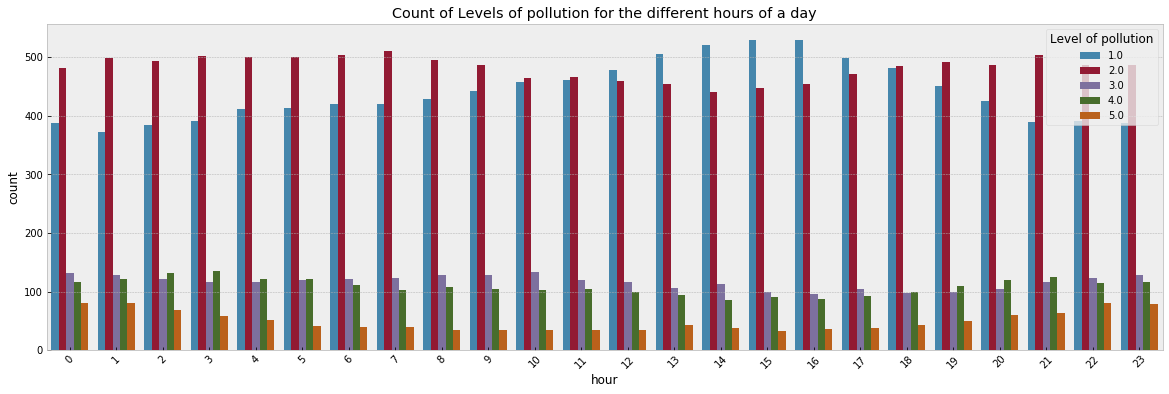

In [69]:
plt.figure(figsize = (20, 6))
plt.title('Count of Levels of pollution for the different hours of a day')
sns.countplot(x = 'hour' , hue='Level of pollution', data = full_train)
plt.xticks(rotation=45)

$\textbf{Observations :}$

During the three years study we see a kind of seasonality :
    - very high levels of pollution (Heavily polluted and Severely polluted) are more likely to be observed in a cold weather : from october to february and during the night : from 20 to 4 oclock.
    - from the end of May to the end of the summer, we are more likely to observe moderately high values of pm2.5.
    - the mean value of the pm2.5 doesn't vary much from a year to another 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

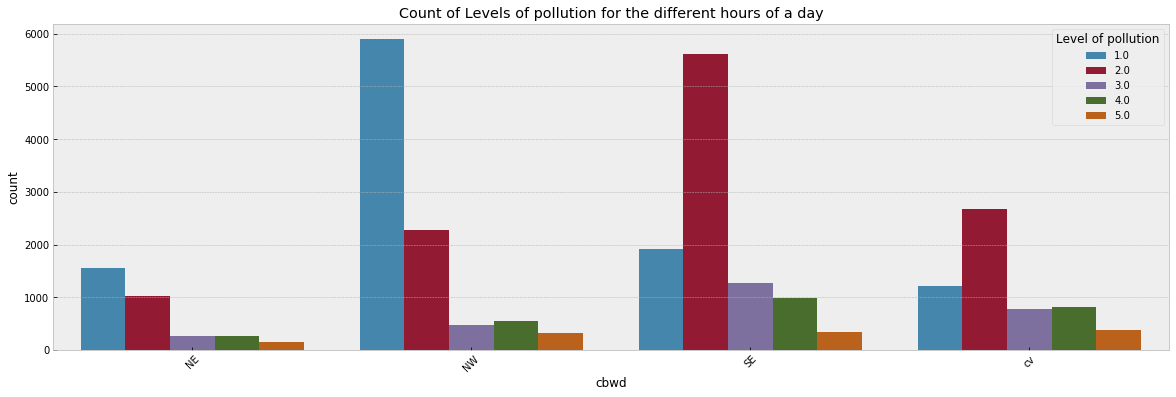

In [70]:
plt.figure(figsize = (20, 6))
plt.title('Count of Levels of pollution for the different hours of a day')
sns.countplot(x = 'cbwd' , hue='Level of pollution', data = full_train)
plt.xticks(rotation=45)

# Analysis of the quantitative features

In [27]:
data_quant.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,28756.000000,28756.000000,28756.000000,28756.000000,28756.000000,28756.000000,28756.000000
mean,100.790409,1.253617,11.562596,1016.592955,25.510508,0.070038,0.212408
std,93.144220,14.346522,12.363157,10.419822,50.472095,0.853704,1.520607
min,0.000000,-29.000000,-19.000000,992.000000,0.450000,0.000000,0.000000
25%,29.000000,-11.000000,0.000000,1008.000000,1.790000,0.000000,0.000000
50%,75.000000,1.000000,12.000000,1016.000000,6.260000,0.000000,0.000000
75%,142.000000,15.000000,23.000000,1025.000000,24.590000,0.000000,0.000000
max,994.000000,28.000000,41.000000,1046.000000,565.490000,27.000000,36.000000


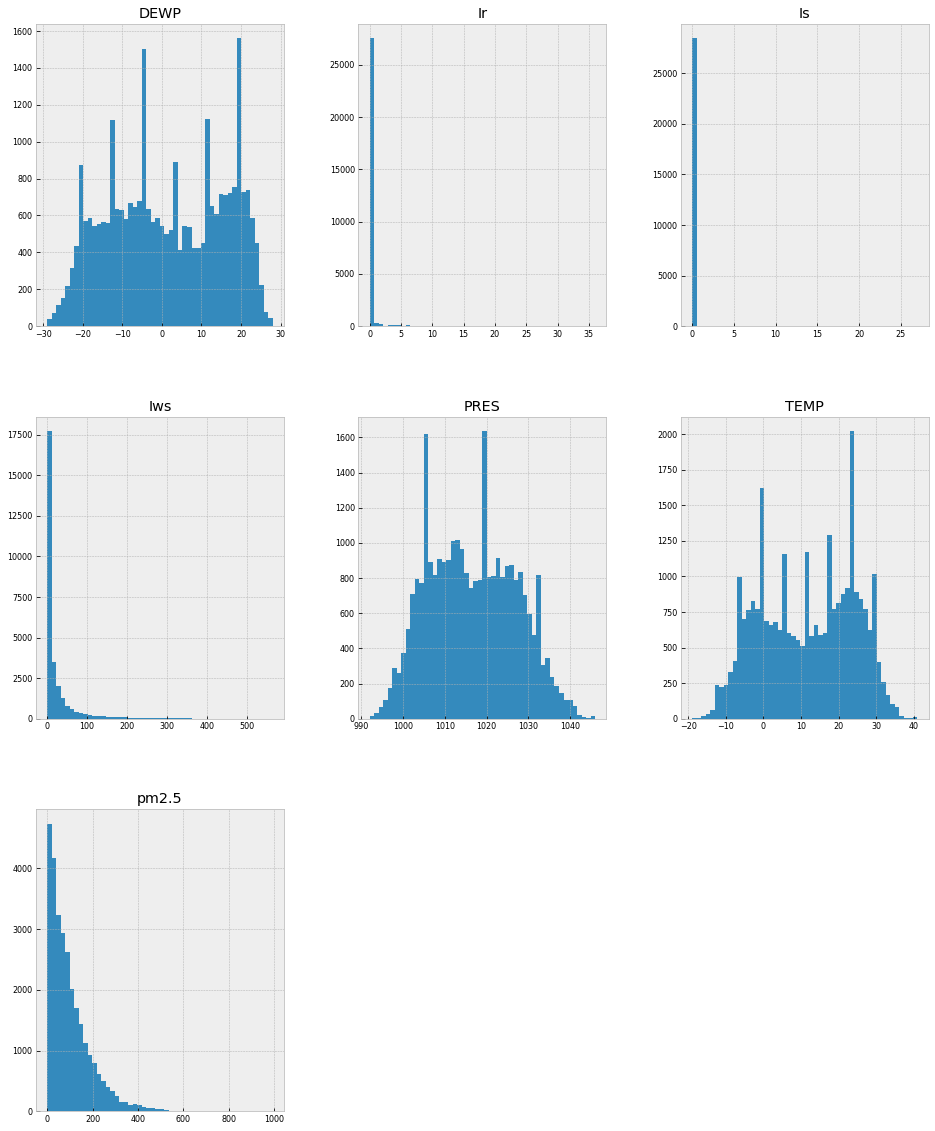

In [13]:
data_quant.hist(figsize=(16, 20), bins = 50, xlabelsize=8, ylabelsize=8)
plt.title('Histogram representing the distribution of each quantitative feature : ')
plt.show()

Remarks :
- very few hours of cumulated snow and cumulated rain,
- Iws, pm2.5 centered around 0

Text(0.5, 1.0, 'Anlaysis of correlations via heatmap')

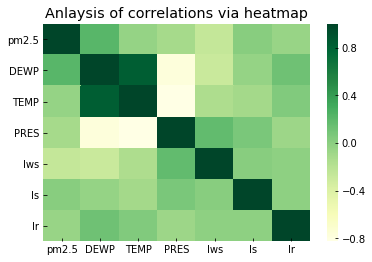

In [ ]:
# Analysis of correlations via heatmap
sns.heatmap(data_quant.corr(), cmap='YlGn')
plt.title('Anlaysis of correlations via heatmap')

The most correlated features with our target pm2.5 are DEWP and Is.
DEWP is also really correlated to te temperature.

# Features importances

Now that we have seen if there were linear relationships between our target and the features via a correlation with the correlation map, we use non linear models (boosting models here) to analyse whether there are some strong non linear relationships

In [122]:
# We first dummify the features
X_train_dummified = X_train.drop(columns=['year', 'month', 'day', 'hour'])
print(cat_cols)
cat_cols_bis = cat_cols.copy()
cat_cols_bis.remove('year')
cat_cols_bis.remove('hour')
cat_cols_bis.remove('day')
cat_cols_bis.remove('month')
print(cat_cols_bis)

['year', 'month', 'day', 'hour', 'cbwd']
['cbwd']


In [124]:
print(X_train_dummified.columns)
print(X_train_dummified.shape)
X_train_dummified = pd.get_dummies(X_train_dummified, columns=cat_cols_bis, dtype='int64')
X_train_dummified.head()

Index(['DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')
(28756, 7)


,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
2010-01-02 00:00:00,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [125]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_dummified, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

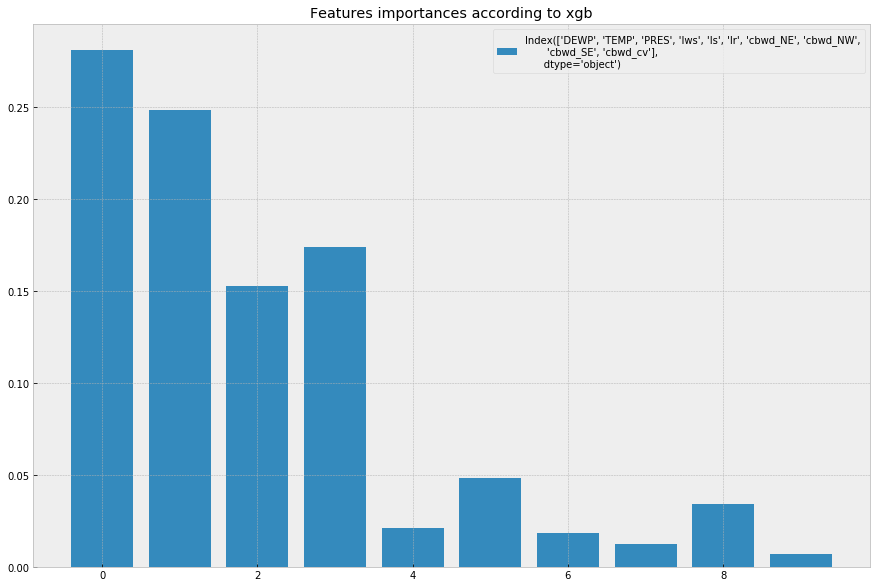

In [127]:
plt.figure(figsize=(15, 10))
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_, label = X_train_dummified.columns)
plt.legend()
plt.title('Features importances according to xgb')
plt.show()

The output seems particularly linked to the 'DEWP' (dewpoint) and the 'TEMP' (temperature).